#Dünya Mutluluk Raporu Analizi

##Mutluluk Raporu Nedir?


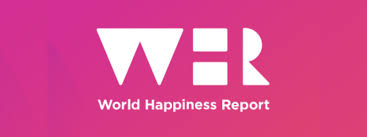

Dünya Mutluluk Raporu yayını olan Birleşmiş Milletler Sürdürülebilir Kalkınma Çözümleri Ağı . Rapor, çeşitli (kalite) yaşam faktörleri ile de ilişkili olan kendi yaşamlarının yanıtlayanların derecelendirmelerine dayalı ulusal mutluluk makalelerini ve sıralamasını içerir

Ulusal mutluluğun sıralaması, bir Cantril merdiveni anketine dayanmaktadır . Ulusal olarak temsil edilen katılımcılardan, bir merdiven düşünmeleri istenir; kendileri için mümkün olan en iyi yaşam 10 ve mümkün olan en kötü yaşam 0'dır. Daha sonra, kendi mevcut yaşamlarını bu 0 ila 10 ölçeğinde derecelendirmeleri istenir. Rapor, yaşam değerlendirme sonuçlarını çeşitli yaşam faktörleriyle ilişkilendirir

Raporlarda kullanılan yaşam faktörü değişkenleri, araştırma literatüründe yaşam değerlendirmelerindeki ulusal düzeydeki farklılıkları açıklayan belirleyicileri yansıtır. Bununla birlikte, işsizlik veya eşitsizlik gibi belirli değişkenler, karşılaştırılabilir veriler henüz tüm ülkelerde mevcut olmadığı için kabul edilmemektedir. Kullanılan değişkenler, nedensel tahminlerden çok önemli korelasyonları göstermektedir

##Veri Okuma

Bazı önemli kütüphanelerin eklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Bilgisayardan verinin yüklenmesi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world-happiness-report.csv to world-happiness-report.csv
Saving world-happiness-report-2021.csv to world-happiness-report-2021.csv


In [ ]:
df1=pd.read_csv("world-happiness-report-2021.csv")
df2=pd.read_csv("world-happiness-report.csv")

##Veri ön işleme

In [ ]:
df1.shape

(149, 20)

In [ ]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
df1

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


Veri setimizde hiç Nan değer yok 

In [ ]:
df1.isnull().any()

Country name                                  False
Regional indicator                            False
Ladder score                                  False
Standard error of ladder score                False
upperwhisker                                  False
lowerwhisker                                  False
Logged GDP per capita                         False
Social support                                False
Healthy life expectancy                       False
Freedom to make life choices                  False
Generosity                                    False
Perceptions of corruption                     False
Ladder score in Dystopia                      False
Explained by: Log GDP per capita              False
Explained by: Social support                  False
Explained by: Healthy life expectancy         False
Explained by: Freedom to make life choices    False
Explained by: Generosity                      False
Explained by: Perceptions of corruption       False
Dystopia + r

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df1.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

##Veri İşleme

Verideki kullanıma ihtiyaç duyulan sütünları ayıralım.

In [ ]:
guess=df1[['Ladder score',
       'Standard error of ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',]]
explain=df1[['Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual']]

In [ ]:
country=df1['Country name']
region=df1['Regional indicator']
yasam_skoru=df1['Ladder score']
gsyh=df1['Logged GDP per capita']
saglik=df1['Healthy life expectancy']
destek=df1['Social support']
ulke_yasam=df1[['Country name','Ladder score']]
comertlik=df1['Generosity']

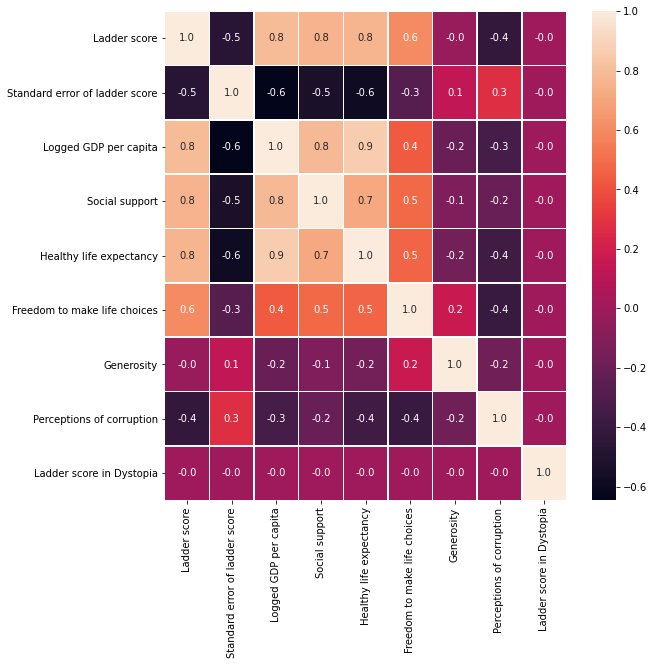

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(guess.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Hayat kalite skoru ile GSYİH,sağlıklı yaşam beklentisi ve sosyal destek arasında güçlü pozitif ilşki olduğu görülüyor.

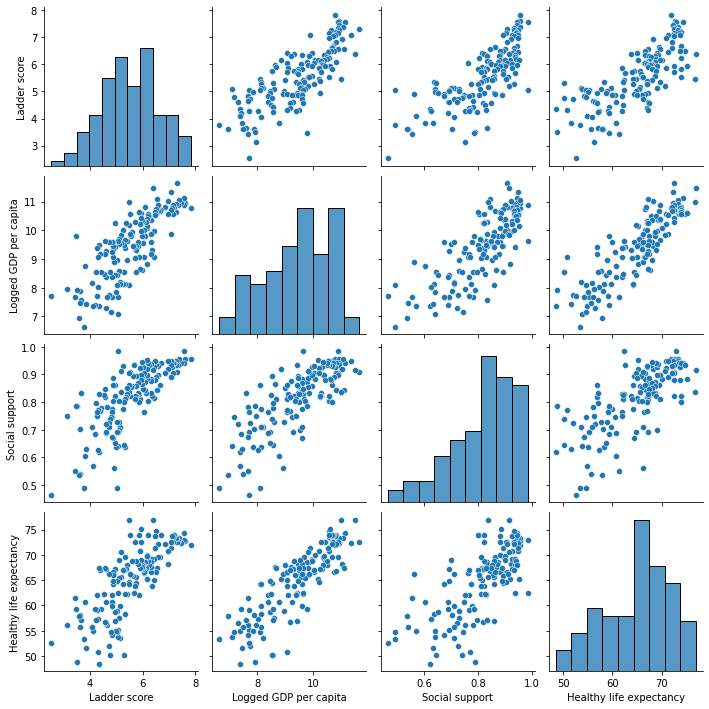

In [ ]:
sns.pairplot(guess.iloc[:,[0,2,3,4]])

Text(0.5, 1.0, 'Bölgelere göre mutluluk skorları')

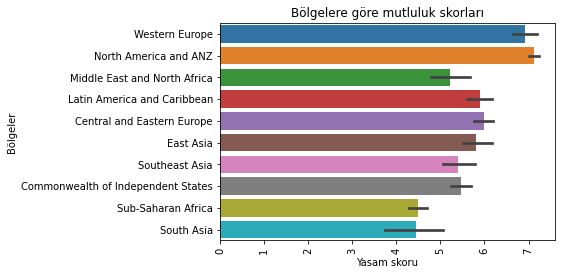

In [ ]:
sns.barplot(x=yasam_skoru,y=region)
plt.xticks(rotation= 90)
plt.xlabel('Yasam skoru')
plt.ylabel('Bölgeler')
plt.title('Bölgelere göre mutluluk skorları')

Text(0.5, 1.0, 'Bölgelere göre GSYH')

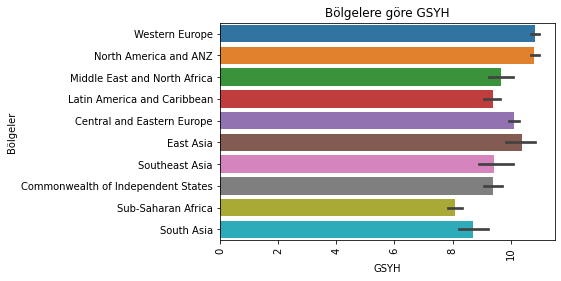

In [ ]:
sns.barplot(x=gsyh,y=region)
plt.xticks(rotation= 90)
plt.xlabel('GSYH')
plt.ylabel('Bölgeler')
plt.title('Bölgelere göre GSYH')

Text(0.5, 1.0, 'Bölgelere göre Saglik beklentisi')

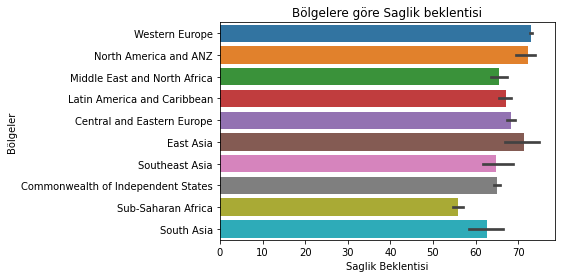

In [ ]:
sns.barplot(x=saglik,y=region)
plt.xlabel('Saglik Beklentisi')
plt.ylabel('Bölgeler')
plt.title('Bölgelere göre Saglik beklentisi')

Korelasyon tablosunda yolsuzluk ile yaşam skoru arasında negatif bir ilişki vardı.

In [ ]:
normalize=(df1['Ladder score']-df1['Ladder score'].min())/(df1['Ladder score'].max()-df1['Ladder score'].min())

Hayat skorunun 0-1 arası normalize edilmesinin sebebi yolsuzluk oranın 0-1 arası değer almasıyla grafikte iki özelliğin daha rahat görülmesi için yapıldı

Text(0.5, 1.0, 'Yolsuzluk oranı vs Hayat skoru')

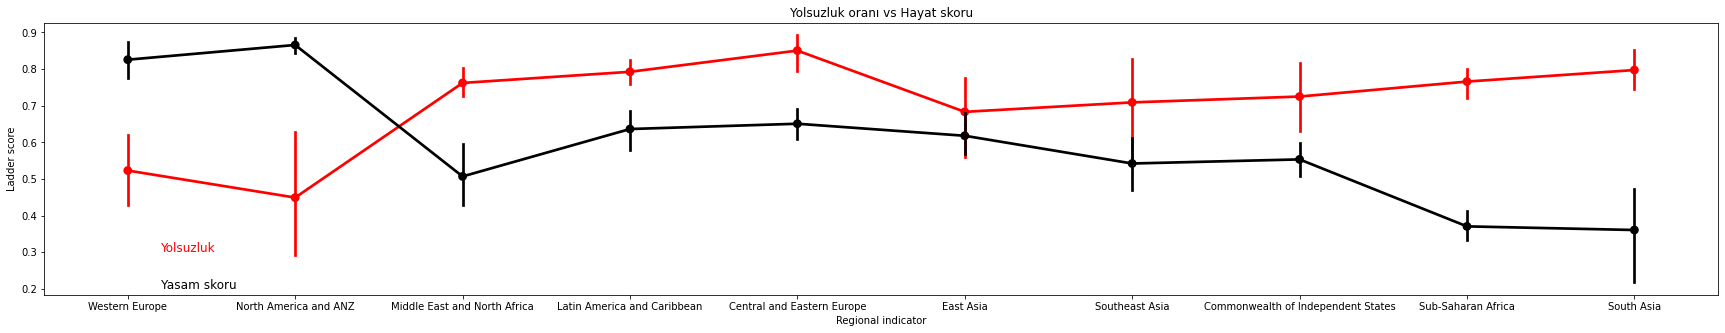

In [ ]:
plt.figure(figsize=(30,5))
sns.pointplot(x=df1['Regional indicator'],y=df1['Perceptions of corruption'],color="red")
plt.text(0.2,0.3,"Yolsuzluk",color="red",fontsize=12)
sns.pointplot(x=df1['Regional indicator'],y=normalize,color="black")
plt.text(0.2,0.2,"Yasam skoru",color="black",fontsize=12)
plt.title("Yolsuzluk oranı vs Hayat skoru")

Yolsuzluk arttıkça mutluluk skoru da düşüyor.

Text(0.5, 1.0, 'Cömertlik vs Hayat skoru')

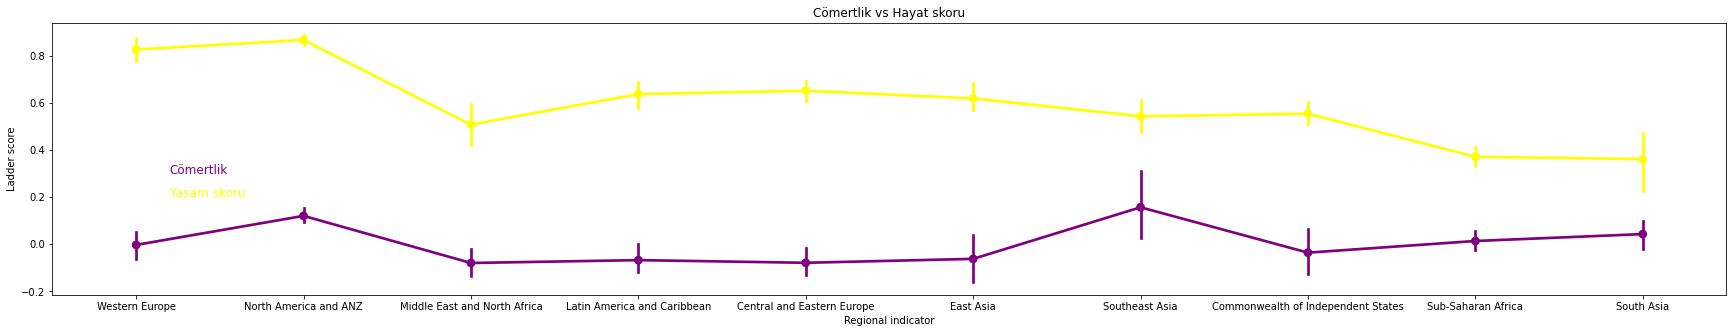

In [ ]:
plt.figure(figsize=(30,5))
sns.pointplot(x=df1['Regional indicator'],y=df1['Generosity'],color="purple")
plt.text(0.2,0.3,"Cömertlik",color="purple",fontsize=12)
sns.pointplot(x=df1['Regional indicator'],y=normalize,color="yellow")
plt.text(0.2,0.2,"Yasam skoru",color="yellow",fontsize=12)
plt.title("Cömertlik vs Hayat skoru")

Kuzey Amerika'da ve Avrupa'da cömertlik ile yaşam skoru arasında pozitif bir ilişki varken Doğu Asya'da cömertlik arttıkça mutluluk azalıyor:)

In [ ]:
ilk10=ulke_yasam[:10]
son10=ulke_yasam[138:148]

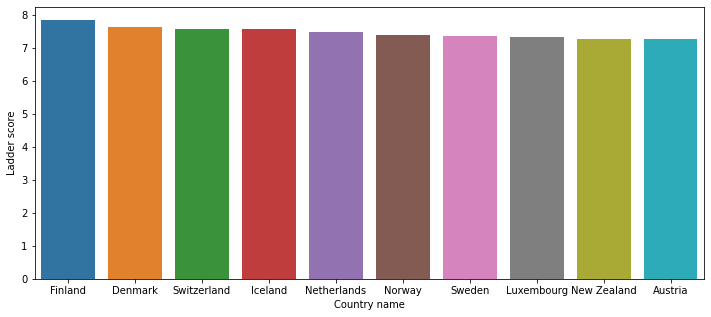

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=ilk10['Country name'],y=ilk10['Ladder score'])

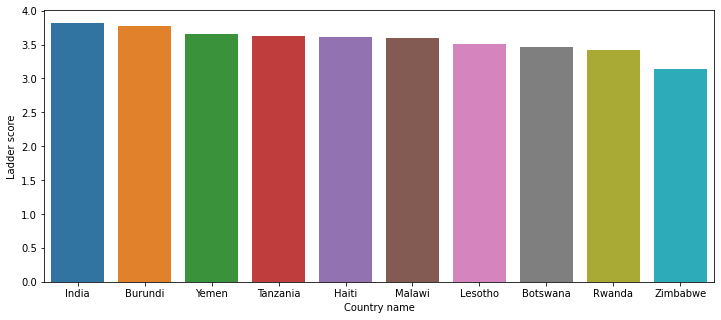

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=son10['Country name'],y=son10['Ladder score'])

In [ ]:
df2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [ ]:
df2.isnull().any()

Country name                        False
year                                False
Life Ladder                         False
Log GDP per capita                   True
Social support                       True
Healthy life expectancy at birth     True
Freedom to make life choices         True
Generosity                           True
Perceptions of corruption            True
Positive affect                      True
Negative affect                      True
dtype: bool

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().any()

Country name                        False
year                                False
Life Ladder                         False
Log GDP per capita                  False
Social support                      False
Healthy life expectancy at birth    False
Freedom to make life choices        False
Generosity                          False
Perceptions of corruption           False
Positive affect                     False
Negative affect                     False
dtype: bool

In [ ]:
df2_mean=df2.groupby('Country name').mean()

In [ ]:
df2_mean.sort_values(by='Life Ladder')

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Central African Republic,2012.200000,3.515000,6.961000,0.402400,43.356000,0.680400,0.027000,0.842000,0.561600,0.391400
Burundi,2012.000000,3.548200,6.722400,0.417800,50.916000,0.450800,-0.036600,0.732400,0.618400,0.244200
Togo,2013.777778,3.555000,7.239222,0.456000,52.837778,0.623333,-0.030778,0.803222,0.561667,0.420000
Afghanistan,2013.500000,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
Rwanda,2013.818182,3.603455,7.482000,0.610455,58.287273,0.863636,0.012364,0.175727,0.725091,0.226818
...,...,...,...,...,...,...,...,...,...,...
Netherlands,2013.846154,7.466462,10.892385,0.932462,71.807692,0.907923,0.276385,0.402923,0.840462,0.211462
Norway,2014.500000,7.512400,11.039100,0.950500,72.670000,0.954400,0.136100,0.344200,0.829600,0.200300
Switzerland,2014.600000,7.548300,11.095400,0.943600,73.334000,0.924700,0.106400,0.305900,0.803800,0.190300


2008-2020 yılları arasındaki yasam skorunun ortalamasının 7 ve üzerinde olan ülkelerin filtreleyelim. 

In [ ]:
over_seven=df2_mean[df2_mean['Life Ladder']>7]

In [ ]:
del over_seven['year']

In [ ]:
over_seven

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Australia,7.277538,10.763000,0.945769,72.792308,0.920692,0.274231,0.417462,0.797385,0.211462
Austria,7.242231,10.886846,0.929538,72.103077,0.906154,0.130462,0.570231,0.788077,0.178154
Canada,7.368786,10.748929,0.935571,72.768571,0.927786,0.215571,0.418714,0.848000,0.250500
Costa Rica,7.179357,9.742000,0.905643,70.385714,0.910643,-0.000929,0.794071,0.866071,0.265571
Denmark,7.656214,10.881214,0.956071,71.281429,0.943214,0.170929,0.197857,0.810429,0.200286
Finland,7.597154,10.749923,0.949000,71.180000,0.939692,0.003077,0.249000,0.774231,0.186462
Iceland,7.434143,10.850571,0.976857,72.845714,0.927571,0.258143,0.701286,0.875857,0.160571
Ireland,7.067714,11.064857,0.960000,71.722857,0.892500,0.240143,0.465786,0.831786,0.215929
Israel,7.221643,10.512071,0.901786,72.648571,0.716571,0.122500,0.832714,0.671714,0.309071


In [ ]:
over_seven.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

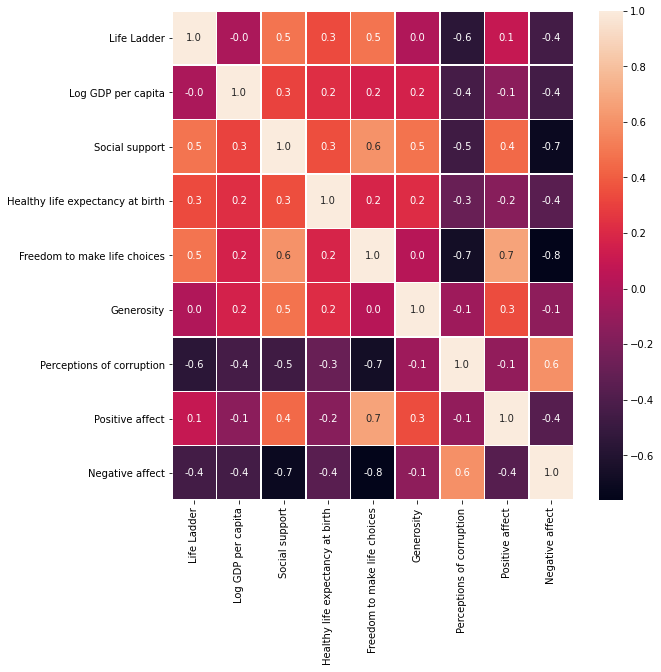

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(over_seven.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Doğumda sağlıklı yaşam beklentisi değerleri yüksek olduğundan normalize edelim

In [ ]:
normalize_dsym=(over_seven['Healthy life expectancy at birth']-over_seven['Healthy life expectancy at birth'].min())/(over_seven['Healthy life expectancy at birth'].max()-over_seven['Healthy life expectancy at birth'].min())

In [ ]:
normalize_lifeladder=(over_seven['Life Ladder']-over_seven['Life Ladder'].min())/(over_seven['Life Ladder'].max()-over_seven['Life Ladder'].min())


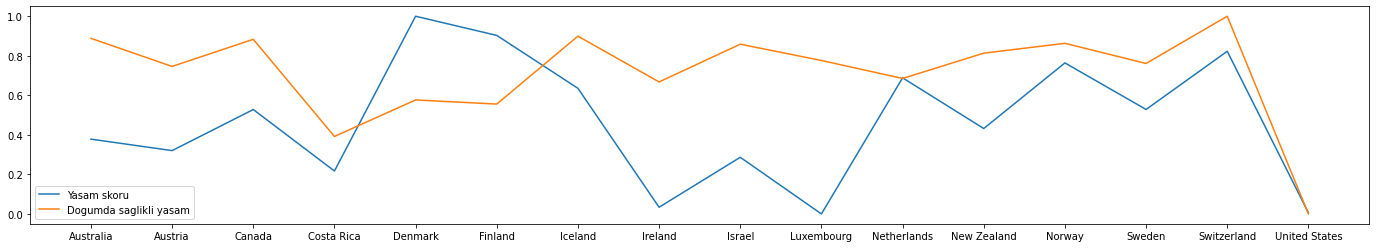

In [ ]:
plt.figure(figsize=(24,4))
plt.plot(normalize_lifeladder,label="Yasam skoru")
plt.plot(normalize_dsym,label="Dogumda saglikli yasam")
plt.legend()

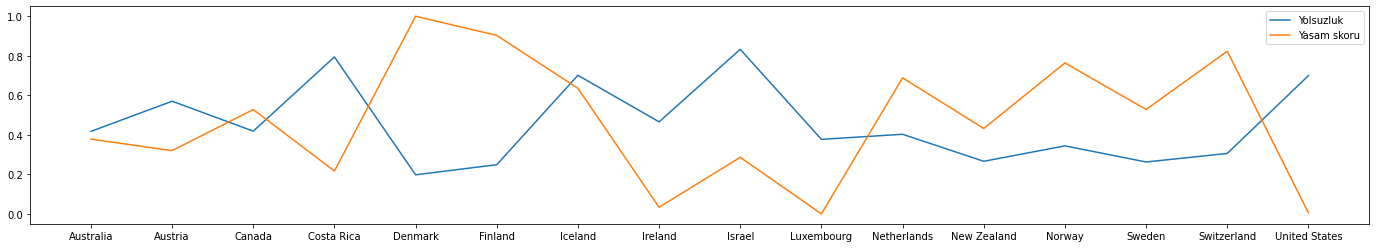

In [ ]:
plt.figure(figsize=(24,4))
plt.plot(over_seven['Perceptions of corruption'],label="Yolsuzluk")
plt.plot(normalize_lifeladder,label="Yasam skoru")
plt.legend()

2008-2020 yılları arasındaki yasam skorunun ortalamasının 5 ve altında olan ülkeleri filtreleyelim. 

In [ ]:
less_than_four=df2_mean[df2_mean['Life Ladder']<4]

In [ ]:
less_than_four

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2013.500000,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
Botswana,2013.250000,3.996333,9.678750,0.826167,54.998333,0.821250,-0.193667,0.782000,0.710250,0.230417
Burundi,2012.000000,3.548200,6.722400,0.417800,50.916000,0.450800,-0.036600,0.732400,0.618400,0.244200
Central African Republic,2012.200000,3.515000,6.961000,0.402400,43.356000,0.680400,0.027000,0.842000,0.561600,0.391400
Comoros,2013.166667,3.944000,7.991167,0.674000,55.686667,0.528167,-0.017000,0.753000,0.693833,0.233833
Haiti,2012.727273,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,0.586727,0.313182
Madagascar,2014.300000,3.980900,7.364800,0.698100,57.582000,0.516000,-0.041000,0.836400,0.713800,0.254800
Rwanda,2013.818182,3.603455,7.482000,0.610455,58.287273,0.863636,0.012364,0.175727,0.725091,0.226818
Tanzania,2013.000000,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,0.723800,0.207600


In [ ]:
del less_than_four['year']

In [ ]:
less_than_four

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
Botswana,3.996333,9.678750,0.826167,54.998333,0.821250,-0.193667,0.782000,0.710250,0.230417
Burundi,3.548200,6.722400,0.417800,50.916000,0.450800,-0.036600,0.732400,0.618400,0.244200
Central African Republic,3.515000,6.961000,0.402400,43.356000,0.680400,0.027000,0.842000,0.561600,0.391400
Comoros,3.944000,7.991167,0.674000,55.686667,0.528167,-0.017000,0.753000,0.693833,0.233833
Haiti,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,0.586727,0.313182
Madagascar,3.980900,7.364800,0.698100,57.582000,0.516000,-0.041000,0.836400,0.713800,0.254800
Rwanda,3.603455,7.482000,0.610455,58.287273,0.863636,0.012364,0.175727,0.725091,0.226818
Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,0.723800,0.207600


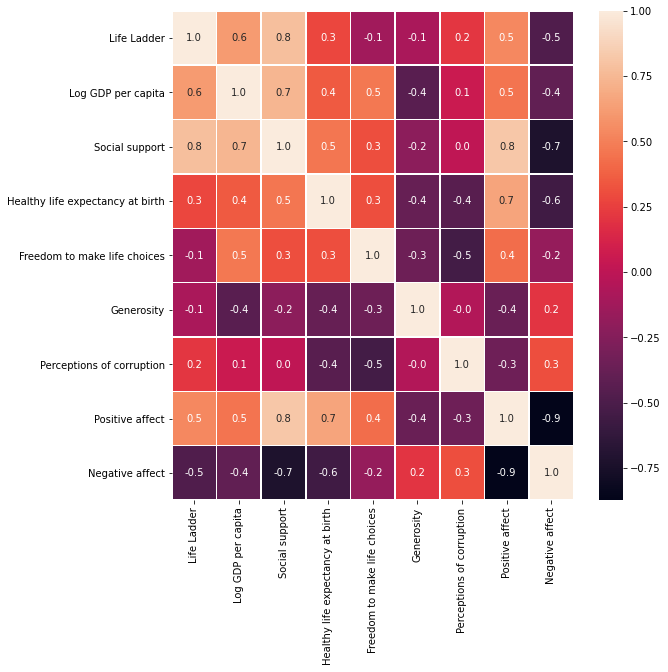

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(less_than_four.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
less_than_four_normalize=(less_than_four['Life Ladder']-less_than_four['Life Ladder'].min())/(less_than_four['Life Ladder'].max()-less_than_four['Life Ladder'].min())

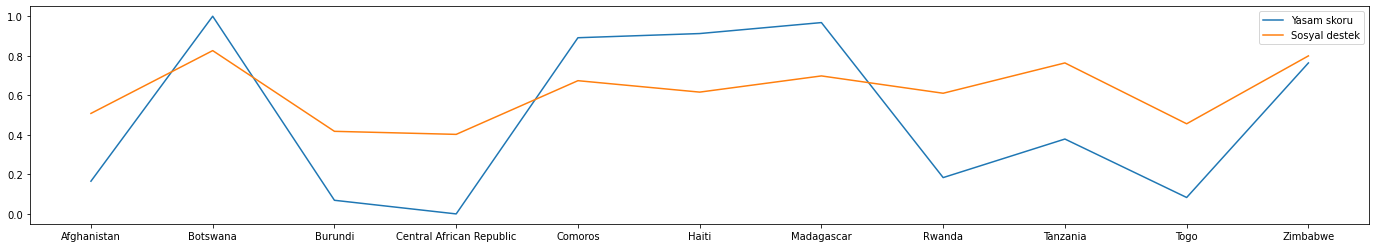

In [127]:
plt.figure(figsize=(24,4))
plt.plot(less_than_four_normalize,label="Yasam skoru")
plt.plot(less_than_four['Social support'],label="Sosyal destek")
plt.legend()

Peki yasam skorlarının bu kadar iyi veya kötü olmasının sebebi ne?

In [ ]:
aggregated_data=pd.concat([less_than_four,over_seven])

In [ ]:
aggregated_data

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
Botswana,3.996333,9.678750,0.826167,54.998333,0.821250,-0.193667,0.782000,0.710250,0.230417
Burundi,3.548200,6.722400,0.417800,50.916000,0.450800,-0.036600,0.732400,0.618400,0.244200
Central African Republic,3.515000,6.961000,0.402400,43.356000,0.680400,0.027000,0.842000,0.561600,0.391400
Comoros,3.944000,7.991167,0.674000,55.686667,0.528167,-0.017000,0.753000,0.693833,0.233833
Haiti,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,0.586727,0.313182
Madagascar,3.980900,7.364800,0.698100,57.582000,0.516000,-0.041000,0.836400,0.713800,0.254800
Rwanda,3.603455,7.482000,0.610455,58.287273,0.863636,0.012364,0.175727,0.725091,0.226818
Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,0.723800,0.207600


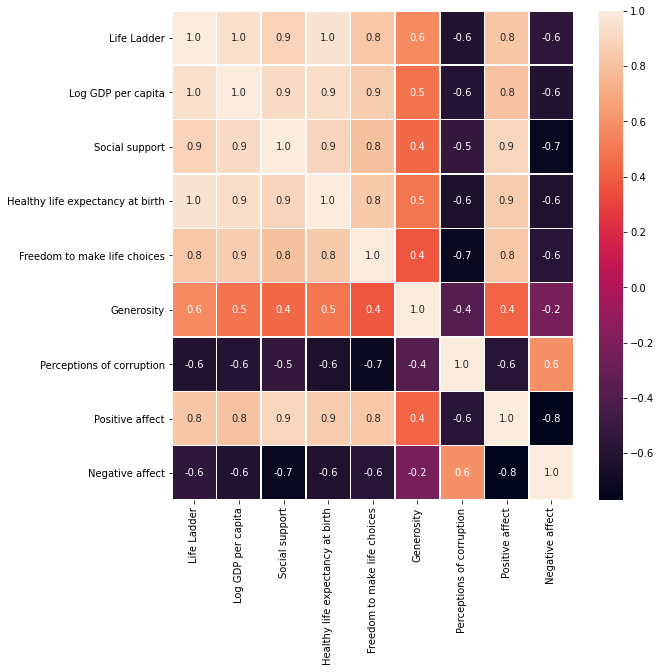

In [141]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(aggregated_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [143]:
n=(aggregated_data['Life Ladder']-aggregated_data['Life Ladder'].min())/(aggregated_data['Life Ladder'].max()-aggregated_data['Life Ladder'].min())

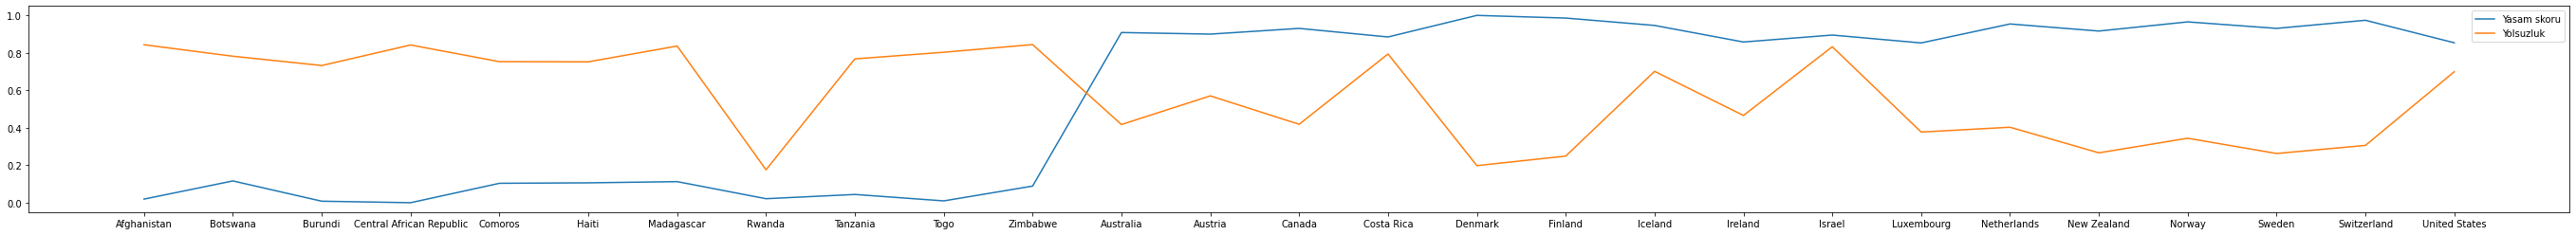

In [144]:
plt.figure(figsize=(48,4))
plt.plot(n,label="Yasam skoru")
plt.plot(aggregated_data['Perceptions of corruption'],label="Yolsuzluk")
plt.legend()

Yasam skorunun yüksek olduğu ve düşük olduğu ülkelerdeki keskin ayrımın yolsuzluk ile orantılı olduğu bilgisi çıkarılabilinir. Yolsuzluk ne kadar artarsa yasam skoru azalmakta.

Ülkemizdeki durumada yakından bakalım

In [ ]:
Turkiye=df2[df2['Country name']=='Turkey']

In [ ]:
Turkiye

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1754,Turkey,2007,5.623,9.903,0.792,63.32,0.459,-0.178,0.800,0.651,0.395
1755,Turkey,2008,5.118,9.899,0.645,63.68,0.415,-0.189,0.785,0.614,0.345
1756,Turkey,2009,5.213,9.838,0.755,64.04,0.456,-0.227,0.853,0.598,0.316
1757,Turkey,2010,5.490,9.906,0.795,64.40,0.515,-0.187,0.811,0.652,0.327
1758,Turkey,2011,5.272,9.996,0.692,64.64,0.446,-0.242,0.649,0.621,0.380
1759,Turkey,2012,5.309,10.026,0.739,64.88,0.471,-0.216,0.702,0.645,0.335
1760,Turkey,2013,4.888,10.091,0.795,65.12,0.541,-0.229,0.698,0.635,0.392
1761,Turkey,2014,5.580,10.124,0.863,65.36,0.649,-0.024,0.764,0.483,0.377
1762,Turkey,2015,5.514,10.166,0.851,65.60,0.653,-0.016,0.806,0.460,0.382
1763,Turkey,2016,5.326,10.181,0.880,66.00,0.644,-0.065,0.764,0.465,0.390


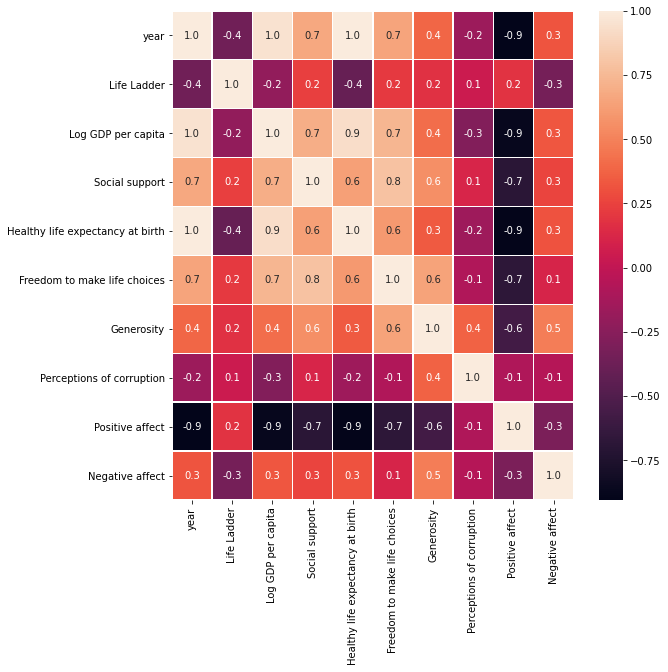

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(Turkiye.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

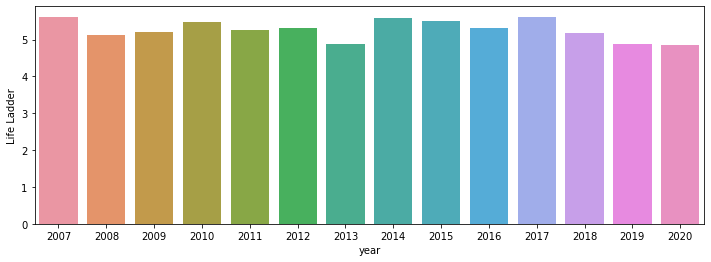

In [150]:
plt.figure(figsize=(12,4))
sns.barplot(x=Turkiye['year'],y=Turkiye['Life Ladder'])

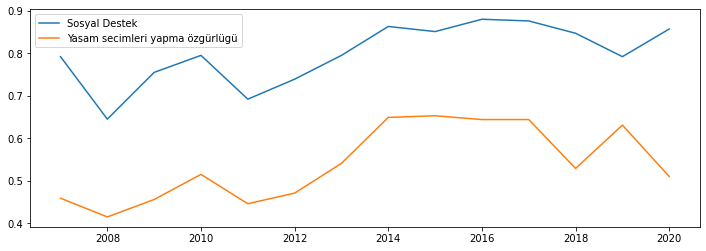

In [154]:
plt.figure(figsize=(12,4))
plt.plot(Turkiye['year'],Turkiye['Social support'],label="Sosyal Destek")
plt.plot(Turkiye['year'],Turkiye['Freedom to make life choices'],label="Yasam secimleri yapma özgürlügü")
plt.legend()

##Kaynakça

[Mutluluk Raporu nedir?](https://en.wikipedia.org/wiki/World_Happiness_Report)